## **Задача 3**

Вам предложены данные с информацией о успеваемости студентов:

Независимые переменные:
* Hours Studied: Общее количество часов, потраченных на учебу каждым студентом.
* Previous Scores: Баллы, полученные студентами на предыдущих экзаменах.
* Sleep Hours: Среднее количество часов сна студента в сутки.
* Sample Question Papers Practiced: Количество пробных экзаменационных работ, с которыми студент занимался.
  
Целевая переменная:
* Performance Index: Показатель общей успеваемости каждого студента. Индекс успеваемости отражает академическую успеваемость студента и округляется до ближайшего целого числа. Индекс варьируется от 10 до 100, при этом более высокие значения свидетельствуют о более высокой успеваемости.

Формализация задачи линейной регрессии - 1 балл\
Реализация функции ошибок (потерь) - 2 балла\
Реализация градиентного спуска - 3 балла\
Предобработка данных - 1 балл\
Данные подготовлены корректно, отсюда утствие пропусков, нормализация или стандартизация выполнены (если нужно), возможно стандартизация нужна, плюс скорректировать бинарные признаки.\

Анализ итоговой модели и коэффициентов регрессии - 1 балл\
Предсказание и оценка точности модели - 1 балл\
Сравнение с библиотечными решениями Python (sklearn) - 1 балл\
Проведено сравнение собственных расчетов с результатами использования библиотек. Оценена точность совпадения.

Вывод и интерпретация результатов - 1 балл\

grad_d_weights [[55.3115    ]
 [ 7.40240354]
 [17.63809533]
 [ 0.80387754]
 [ 0.54854088]]

skl_weights [[ 0.          7.40240354 17.63809533  0.80387754  0.54854088]]

skl_w_0 [55.3115]


'regression_metrics_train'

{'MSE': 4.262289072936617,
 'RMSE': np.float64(2.064531199312962),
 'R²': 0.9884388348325367}

'regression_metrics_test'

{'MSE': 4.182254914551319,
 'RMSE': np.float64(2.0450562130541345),
 'R²': 0.9887144552385333}

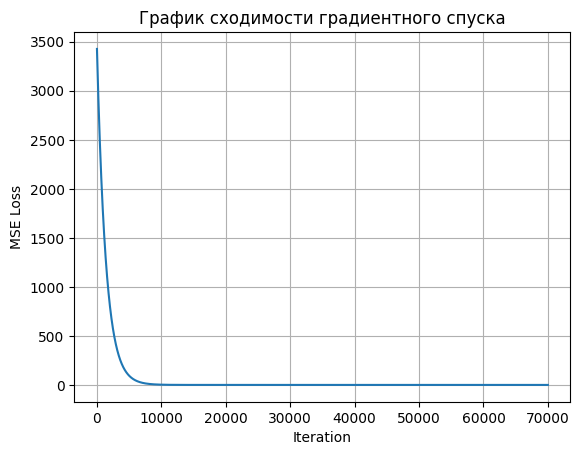

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# данные, предобработка, моделирование
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor

# метрики
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_log_error,
    max_error,
    r2_score
)

np.random.seed(28)


#Загружаем файл с данными. Преобразуем его в датафрейм.

df = pd.read_csv('C:\IDE\Math analyze\Student_Performance.txt')

#Получаем информацию о датафрейме, в том числе убеждаемся в отсутствии пропусков, так как даный метод указывает эту информацию. 

#df.info()


#Определяем признаки
X = df[['Hours Studied',	'Previous Scores',	'Sleep Hours',	'Sample Question Papers Practiced']]
#print(X)



#Определяем целевую переменную
y = df['Performance Index']
#print(y)

# Разделим на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Прибавляем к массиву признаков столбец свободных коэффициентов, также проверяем размерность массива признаков
n_train = len(y_train)
n_test = len(y_test)
X_train = np.append(np.ones((n_train,1)), X_train.reshape(n_train,4), axis = 1)
X_test = np.append(np.ones((n_test,1)), X_test.reshape(n_test,4), axis = 1)

# Задаем необходимую размерность массива целевой переменной
y_train = y_train.values.reshape(n_train,1)

# Задаем начальное приближение, нулевой вектор размерностью, необходимой для умножения на массив признаков

weights = np.zeros((X_train.shape[1], 1))
#print(weights)


# Составляем функцию ошибок(потерь)

def loss_function(X, y , weights):
    
    # Расчет предсказания модели
    y_pred = np.dot(X, weights)
    
    # Расчет значения функции ошибки MSE
    error = (y_pred - y)**2
    loss = 1/(n)*np.sum(error)
  
    return loss

# Составляем функцию градиентного спуска
def grad_d(X, y, weights, step, iterations):

    losses = []
    for i in range(iterations):
        y_pred = np.dot(X, weights)
        grad = (2/n) * ((X.transpose())@(y_pred - y))
        
        weights -= step * grad
        losses.append(loss_function(X, y, weights))

    return weights, losses

weights, losses_opt = grad_d(X_train, y_train, weights, 0.00018, 70000)

print('grad_d_weights', weights)
print()

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print('skl_weights', model.coef_)
print()
print('skl_w_0', model.intercept_)

p_gd_train = X_train @ weights
p_gd_test = X_test @ weights

def regression_metrics(y_true, y_pred):
    """
    Вычисляет метрики качества линейной регрессии.

    Parameters
    ----------
    y_true : array-like
        Реальные значения (таргет).
    y_pred : array-like
        Предсказанные значения.

    Returns
    -------
    dict
        Словарь с метриками: MSE, RMSE,  R².
    """

    # MSE
    mse = mean_squared_error(y_true, y_pred)

    # RMSE
    rmse = np.sqrt(mse)

    # R^2
    r2 = r2_score(y_true, y_pred)

    return {
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    }
    
display('regression_metrics_train', regression_metrics(y_train, p_gd_train))
print()
display('regression_metrics_test', regression_metrics(y_test, p_gd_test))

# График сходимости градиентного спуска
def plot_history(losses):
    """
    Визуализация графика сходимости
    (значение losses в зависимости от номера итерации)
    """
    plt.plot(losses)
    plt.xlabel("Iteration")
    plt.ylabel("MSE Loss")
    plt.title("График сходимости градиентного спуска")
    plt.grid(True)
    plt.show()
    
plot_history(losses_opt)  
    


